In [8]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
#https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing

In [9]:
df = pd.read_excel("preparedData.xlsx")

In [10]:
df.index = pd.to_datetime(df['date'], format='%d-%m-%Y')
df[:26]

,date,new_cases,new_cases_smoothed,reproduction_rate,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,book covid test: (Ireland)_y,covid test dublin: (Ireland),covid test centre: (Ireland),hse covid vaccine: (Ireland),hse vaccine portal: (Ireland),hse portal vaccine: (Ireland),pcr test hse: (Ireland),hse covid test: (Ireland),hse vaccine registration: (Ireland),how long will it take to vaccinate ireland: (Ireland)
date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,2020-03-15,0,15.714,2.51,0,0.0000,0.0,0,0,0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-03-16,2020-03-16,40,21.143,2.59,0,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-17,2020-03-17,54,27.000,2.70,0,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-18,2020-03-18,69,35.571,2.78,0,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-19,2020-03-19,265,73.429,2.84,946,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-20,2020-03-20,126,84.714,2.65,1469,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-21,2020-03-21,102,93.714,2.49,1564,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-22,2020-03-22,121,111.000,2.39,978,0.0000,0.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-23,2020-03-23,219,136.571,2.28,2581,0.0000,0.0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df.drop(columns=['reproduction_rate', 'new_tests', 'positive_rate',
       'tests_per_case', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'life_expectancy', 'human_development_index',
       'covid: (Ireland)', 'COVID-19 testing: (Ireland)',
       'COVID-19 rapid antigen test: (Ireland)',
       'Health Service Executive: (Ireland)', 'Vaccination: (Ireland)',
       'book covid test: (Ireland)_x', 'how many covid cases today: (Ireland)',
       'pcr covid test: (Ireland)', 'close contact covid: (Ireland)',
       'book a covid test: (Ireland)', 'vaccination centre: (Ireland)',
       'pharmacy near me: (Ireland)',
       'Treatment and management of COVID-19: (Ireland)',
       'Hand sanitizer: (Ireland)', 'Face mask: (Ireland)',
       'book covid test: (Ireland)_y', 'covid test dublin: (Ireland)',
       'covid test centre: (Ireland)', 'hse covid vaccine: (Ireland)',
       'hse vaccine portal: (Ireland)', 'hse portal vaccine: (Ireland)',
       'pcr test hse: (Ireland)', 'hse covid test: (Ireland)',
       'hse vaccine registration: (Ireland)',
       'how long will it take to vaccinate ireland: (Ireland)'], inplace=True)

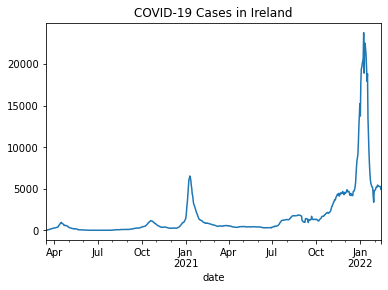

In [13]:
cases = df['new_cases_smoothed']
plt.title("COVID-19 Cases in Ireland")
cases.plot()
plt.savefig("New Cases.jpg", bbox_inches='tight')

In [6]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(cases, WINDOW_SIZE)
X.shape, y.shape

((694, 5, 1), (694,))

In [8]:
X_train, y_train = X[:490], y[:490]
X_val, y_val = X[490:630], y[490:630]
X_test, y_test = X[630:], y[630:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((490, 5, 1), (490,), (140, 5, 1), (140,), (64, 5, 1), (64,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [10]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [11]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
14/16 [=========================>....] - ETA: 0s - loss: 1219022.0000 - root_mean_squared_error: 1104.0933

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 2s 98ms/step - loss: 1136834.1250 - root_mean_squared_error: 1066.2242 - val_loss: 6491362.5000 - val_root_mean_squared_error: 2547.8154
Epoch 2/10
15/16 [===========================>..] - ETA: 0s - loss: 1155678.8750 - root_mean_squared_error: 1075.0250

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 81ms/step - loss: 1136743.0000 - root_mean_squared_error: 1066.1815 - val_loss: 6490990.0000 - val_root_mean_squared_error: 2547.7422
Epoch 3/10
15/16 [===========================>..] - ETA: 0s - loss: 1154217.1250 - root_mean_squared_error: 1074.3450

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 81ms/step - loss: 1136604.3750 - root_mean_squared_error: 1066.1165 - val_loss: 6490330.5000 - val_root_mean_squared_error: 2547.6128
Epoch 4/10
15/16 [===========================>..] - ETA: 0s - loss: 1156632.3750 - root_mean_squared_error: 1075.4685

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 75ms/step - loss: 1136512.3750 - root_mean_squared_error: 1066.0734 - val_loss: 6490126.0000 - val_root_mean_squared_error: 2547.5725
Epoch 5/10
15/16 [===========================>..] - ETA: 0s - loss: 1138217.2500 - root_mean_squared_error: 1066.8727

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 82ms/step - loss: 1136453.0000 - root_mean_squared_error: 1066.0455 - val_loss: 6489946.5000 - val_root_mean_squared_error: 2547.5374
Epoch 6/10
15/16 [===========================>..] - ETA: 0s - loss: 1156279.5000 - root_mean_squared_error: 1075.3043

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 79ms/step - loss: 1136389.1250 - root_mean_squared_error: 1066.0155 - val_loss: 6489722.5000 - val_root_mean_squared_error: 2547.4934
Epoch 7/10
15/16 [===========================>..] - ETA: 0s - loss: 1139951.7500 - root_mean_squared_error: 1067.6852

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 80ms/step - loss: 1136243.5000 - root_mean_squared_error: 1065.9473 - val_loss: 6489128.5000 - val_root_mean_squared_error: 2547.3770
Epoch 8/10
15/16 [===========================>..] - ETA: 0s - loss: 1077836.5000 - root_mean_squared_error: 1038.1891

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 75ms/step - loss: 1136154.1250 - root_mean_squared_error: 1065.9053 - val_loss: 6488984.5000 - val_root_mean_squared_error: 2547.3486
Epoch 9/10
15/16 [===========================>..] - ETA: 0s - loss: 1155185.1250 - root_mean_squared_error: 1074.7954

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 81ms/step - loss: 1136116.8750 - root_mean_squared_error: 1065.8878 - val_loss: 6488831.0000 - val_root_mean_squared_error: 2547.3184
Epoch 10/10
15/16 [===========================>..] - ETA: 0s - loss: 1140843.6250 - root_mean_squared_error: 1068.1029

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


16/16 [==============================] - 1s 79ms/step - loss: 1136065.7500 - root_mean_squared_error: 1065.8639 - val_loss: 6488558.0000 - val_root_mean_squared_error: 2547.2649


In [12]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [13]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.048272,84.714
1,0.016187,93.714
2,-0.053811,111.000
3,-0.055834,136.571
4,-0.007821,158.000
...,...,...
485,0.045267,945.429
486,0.043946,1016.714
487,0.043172,1091.143
488,0.042622,1165.857


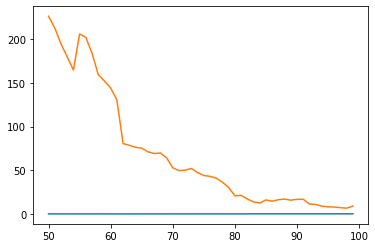

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [17]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,0.042033,1224.429
1,0.041873,1219.857
2,0.041956,1212.286
3,0.041987,1241.571
4,0.041990,1242.143
...,...,...
135,0.044339,4885.143
136,0.044359,4643.429
137,0.044335,4658.714
138,0.044337,4706.714


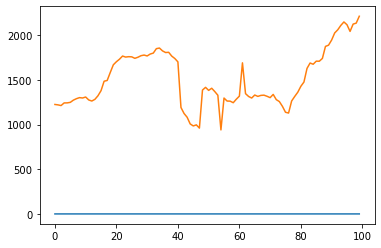

In [18]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [20]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,0.044338,4497.143
1,0.044327,4266.000
2,0.044306,4196.143
3,0.044291,4449.286
4,0.044300,4207.286
...,...,...
59,0.044380,5439.143
60,0.044389,5378.000
61,0.044387,5340.429
62,0.044390,5281.571


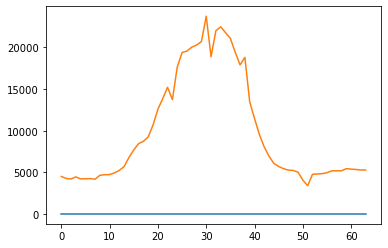

In [21]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [22]:
# Part 2

In [23]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(    Predictions   Actuals
 0      0.044338  4497.143
 1      0.044327  4266.000
 2      0.044306  4196.143
 3      0.044291  4449.286
 4      0.044300  4207.286
 ..          ...       ...
 59     0.044380  5439.143
 60     0.044389  5378.000
 61     0.044387  5340.429
 62     0.044390  5281.571
 63     0.044387  5270.286
 
 [64 rows x 2 columns],
 136775857.5911147)

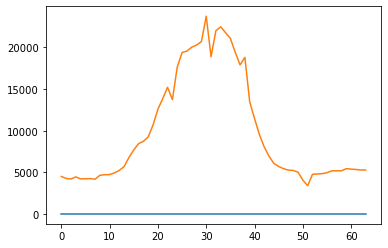

In [24]:
plot_predictions1(model1, X_test, y_test)

In [25]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [26]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [27]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
12/16 [=====================>........] - ETA: 0s - loss: 1434991.0000 - root_mean_squared_error: 1197.9111INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 1s 22ms/step - loss: 1401094.6250 - root_mean_squared_error: 1183.6785 - val_loss: 7531819.0000 - val_root_mean_squared_error: 2744.4160
Epoch 2/10
13/16 [=======================>......] - ETA: 0s - loss: 1316748.3750 - root_mean_squared_error: 1147.4966INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 1262724.6250 - root_mean_squared_error: 1123.7102 - val_loss: 6839654.0000 - val_root_mean_squared_error: 2615.2732
Epoch 3/10
13/16 [=======================>......] - ETA: 0s - loss: 1155479.3750 - root_mean_squared_error: 1074.9323INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 1148969.7500 - root_mean_squared_error: 1071.9001 - val_loss: 6259256.5000 - val_root_mean_squared_error: 2501.8506
Epoch 4/10
13/16 [=======================>......] - ETA: 0s - loss: 1134676.6250 - root_mean_squared_error: 1065.2120INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 1081260.3750 - root_mean_squared_error: 1039.8367 - val_loss: 5964057.5000 - val_root_mean_squared_error: 2442.1421
Epoch 5/10
12/16 [=====================>........] - ETA: 0s - loss: 976191.5000 - root_mean_squared_error: 988.0240  INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 1030050.6875 - root_mean_squared_error: 1014.9141 - val_loss: 5773709.5000 - val_root_mean_squared_error: 2402.8545
Epoch 6/10
13/16 [=======================>......] - ETA: 0s - loss: 885972.6250 - root_mean_squared_error: 941.2612INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 1000165.6250 - root_mean_squared_error: 1000.0828 - val_loss: 5586755.0000 - val_root_mean_squared_error: 2363.6318
Epoch 7/10
12/16 [=====================>........] - ETA: 0s - loss: 789505.5000 - root_mean_squared_error: 888.5413  INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 24ms/step - loss: 973492.3750 - root_mean_squared_error: 986.6572 - val_loss: 5486538.0000 - val_root_mean_squared_error: 2342.3359
Epoch 8/10
12/16 [=====================>........] - ETA: 0s - loss: 1132837.5000 - root_mean_squared_error: 1064.3484INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 18ms/step - loss: 956418.3750 - root_mean_squared_error: 977.9665 - val_loss: 5387806.0000 - val_root_mean_squared_error: 2321.1648
Epoch 9/10
12/16 [=====================>........] - ETA: 0s - loss: 987309.5000 - root_mean_squared_error: 993.6345  INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 939816.3750 - root_mean_squared_error: 969.4413 - val_loss: 5302493.5000 - val_root_mean_squared_error: 2302.7144
Epoch 10/10
13/16 [=======================>......] - ETA: 0s - loss: 761124.5625 - root_mean_squared_error: 872.4246INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


16/16 [==============================] - 0s 17ms/step - loss: 924312.3125 - root_mean_squared_error: 961.4117 - val_loss: 5219978.0000 - val_root_mean_squared_error: 2284.7273


In [28]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [29]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [30]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 1137993.7500 - root_mean_squared_error: 1066.7679

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 2s 88ms/step - loss: 1137993.7500 - root_mean_squared_error: 1066.7679 - val_loss: 6495748.5000 - val_root_mean_squared_error: 2548.6758
Epoch 2/10
15/16 [===========================>..] - ETA: 0s - loss: 1154616.7500 - root_mean_squared_error: 1074.5310

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 68ms/step - loss: 1137871.8750 - root_mean_squared_error: 1066.7108 - val_loss: 6495435.0000 - val_root_mean_squared_error: 2548.6143
Epoch 3/10
15/16 [===========================>..] - ETA: 0s - loss: 1136383.7500 - root_mean_squared_error: 1066.0131

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 79ms/step - loss: 1137784.3750 - root_mean_squared_error: 1066.6698 - val_loss: 6495127.0000 - val_root_mean_squared_error: 2548.5540
Epoch 4/10
15/16 [===========================>..] - ETA: 0s - loss: 1157301.1250 - root_mean_squared_error: 1075.7793

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 68ms/step - loss: 1137695.5000 - root_mean_squared_error: 1066.6282 - val_loss: 6494819.0000 - val_root_mean_squared_error: 2548.4934
Epoch 5/10
15/16 [===========================>..] - ETA: 0s - loss: 1153095.3750 - root_mean_squared_error: 1073.8228

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 68ms/step - loss: 1137595.6250 - root_mean_squared_error: 1066.5813 - val_loss: 6494510.5000 - val_root_mean_squared_error: 2548.4331
Epoch 6/10
15/16 [===========================>..] - ETA: 0s - loss: 1156992.7500 - root_mean_squared_error: 1075.6360

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 79ms/step - loss: 1137352.8750 - root_mean_squared_error: 1066.4675 - val_loss: 6492208.0000 - val_root_mean_squared_error: 2547.9812
Epoch 7/10
15/16 [===========================>..] - ETA: 0s - loss: 1155391.5000 - root_mean_squared_error: 1074.8915

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 75ms/step - loss: 1136955.2500 - root_mean_squared_error: 1066.2810 - val_loss: 6491683.5000 - val_root_mean_squared_error: 2547.8782
Epoch 8/10
15/16 [===========================>..] - ETA: 0s - loss: 1157875.5000 - root_mean_squared_error: 1076.0463

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 68ms/step - loss: 1136794.6250 - root_mean_squared_error: 1066.2057 - val_loss: 6491209.5000 - val_root_mean_squared_error: 2547.7854
Epoch 9/10
15/16 [===========================>..] - ETA: 0s - loss: 1158119.5000 - root_mean_squared_error: 1076.1595

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 68ms/step - loss: 1136595.1250 - root_mean_squared_error: 1066.1122 - val_loss: 6490457.5000 - val_root_mean_squared_error: 2547.6377
Epoch 10/10
16/16 [==============================] - ETA: 0s - loss: 1136429.8750 - root_mean_squared_error: 1066.0347

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


16/16 [==============================] - 1s 79ms/step - loss: 1136429.8750 - root_mean_squared_error: 1066.0347 - val_loss: 6489947.5000 - val_root_mean_squared_error: 2547.5376


In [44]:
df2 = pd.read_excel("preparedData.xlsx")

In [45]:
date_time = pd.to_datetime(df.pop('date'), format='%d-%m-%Y')

In [46]:
def df_to_X_y2(df2, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [47]:
X1, y1 = df_to_X_y2(df)
X1.shape, y1.shape

((693, 6, 1), (693,))

In [48]:
X_train1, y_train1 = X1[:490], y1[:490]
X_val1, y_val1 = X1[490:630], y1[490:630]
X_test1, y_test1 = X1[630:], y1[630:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((490, 6, 1), (490,), (140, 6, 1), (140,), (63, 6, 1), (63,))

In [49]:
temp_training_mean = np.mean(X_train1[:, :, 0])
temp_training_std = np.std(X_train1[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [50]:
preprocess(X_train1)
preprocess(X_val1)
preprocess(X_test1)

array([[[ 4.8263651 ],
        [ 4.55558442],
        [ 4.57270748],
        [ 4.62647959],
        [ 4.60151476],
        [ 4.39170718]],

       [[ 4.55558442],
        [ 4.57270748],
        [ 4.62647959],
        [ 4.60151476],
        [ 4.39170718],
        [ 4.13276869]],

       [[ 4.57270748],
        [ 4.62647959],
        [ 4.60151476],
        [ 4.39170718],
        [ 4.13276869],
        [ 4.05451122]],

       [[ 4.62647959],
        [ 4.60151476],
        [ 4.39170718],
        [ 4.13276869],
        [ 4.05451122],
        [ 4.33809526]],

       [[ 4.60151476],
        [ 4.39170718],
        [ 4.13276869],
        [ 4.05451122],
        [ 4.33809526],
        [ 4.06699419]],

       [[ 4.39170718],
        [ 4.13276869],
        [ 4.05451122],
        [ 4.33809526],
        [ 4.06699419],
        [ 4.08363778]],

       [[ 4.13276869],
        [ 4.05451122],
        [ 4.33809526],
        [ 4.06699419],
        [ 4.08363778],
        [ 4.10572244]],

       [[ 4.05451122

In [55]:
model4 = Sequential()
model4.add(InputLayer((6, 1)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [56]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [57]:
model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp4])

Epoch 1/10
14/16 [=========================>....] - ETA: 0s - loss: 1210455.3750 - root_mean_squared_error: 1100.2070

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 2s 90ms/step - loss: 1139323.6250 - root_mean_squared_error: 1067.3910 - val_loss: 6623613.0000 - val_root_mean_squared_error: 2573.6379
Epoch 2/10
15/16 [===========================>..] - ETA: 0s - loss: 1152330.8750 - root_mean_squared_error: 1073.4668

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 82ms/step - loss: 1139266.3750 - root_mean_squared_error: 1067.3643 - val_loss: 6623244.0000 - val_root_mean_squared_error: 2573.5664
Epoch 3/10
14/16 [=========================>....] - ETA: 0s - loss: 1216018.3750 - root_mean_squared_error: 1102.7322

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 75ms/step - loss: 1139216.8750 - root_mean_squared_error: 1067.3411 - val_loss: 6622890.0000 - val_root_mean_squared_error: 2573.4978
Epoch 4/10
15/16 [===========================>..] - ETA: 0s - loss: 1155694.6250 - root_mean_squared_error: 1075.0325

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 84ms/step - loss: 1139162.0000 - root_mean_squared_error: 1067.3153 - val_loss: 6622618.5000 - val_root_mean_squared_error: 2573.4448
Epoch 5/10
14/16 [=========================>....] - ETA: 0s - loss: 1054775.1250 - root_mean_squared_error: 1027.0225

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 74ms/step - loss: 1139121.6250 - root_mean_squared_error: 1067.2964 - val_loss: 6622402.5000 - val_root_mean_squared_error: 2573.4028
Epoch 6/10
15/16 [===========================>..] - ETA: 0s - loss: 1096723.0000 - root_mean_squared_error: 1047.2455

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 85ms/step - loss: 1139087.7500 - root_mean_squared_error: 1067.2805 - val_loss: 6622292.0000 - val_root_mean_squared_error: 2573.3813
Epoch 7/10
15/16 [===========================>..] - ETA: 0s - loss: 1084594.7500 - root_mean_squared_error: 1041.4387

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 73ms/step - loss: 1139061.3750 - root_mean_squared_error: 1067.2682 - val_loss: 6622260.0000 - val_root_mean_squared_error: 2573.3752
Epoch 8/10
15/16 [===========================>..] - ETA: 0s - loss: 1156734.5000 - root_mean_squared_error: 1075.5160

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 83ms/step - loss: 1139046.7500 - root_mean_squared_error: 1067.2614 - val_loss: 6622232.5000 - val_root_mean_squared_error: 2573.3699
Epoch 9/10
15/16 [===========================>..] - ETA: 0s - loss: 1159288.2500 - root_mean_squared_error: 1076.7025

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 81ms/step - loss: 1139033.6250 - root_mean_squared_error: 1067.2551 - val_loss: 6622198.5000 - val_root_mean_squared_error: 2573.3633
Epoch 10/10
15/16 [===========================>..] - ETA: 0s - loss: 1143262.5000 - root_mean_squared_error: 1069.2345

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


16/16 [==============================] - 1s 73ms/step - loss: 1139017.8750 - root_mean_squared_error: 1067.2478 - val_loss: 6622166.0000 - val_root_mean_squared_error: 2573.3569


(    Predictions   Actuals
 0      0.103162  4266.000
 1      0.101839  4196.143
 2      0.100610  4449.286
 3      0.100859  4207.286
 4      0.100912  4222.143
 ..          ...       ...
 58     0.106582  5439.143
 59     0.106763  5378.000
 60     0.107476  5340.429
 61     0.107673  5281.571
 62     0.106912  5270.286
 
 [63 rows x 2 columns],
 138629117.59993878)

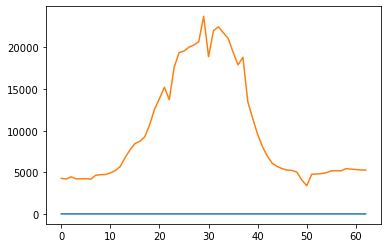

In [60]:
plot_predictions1(model4, X_test1, y_test1)

In [62]:
p_temp_df = pd.concat([df['new_cases_smoothed'], df2], axis=1)
p_temp_df.head()

,new_cases_smoothed,date,new_cases_smoothed,reproduction_rate,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,...,book covid test: (Ireland)_y,covid test dublin: (Ireland),covid test centre: (Ireland),hse covid vaccine: (Ireland),hse vaccine portal: (Ireland),hse portal vaccine: (Ireland),pcr test hse: (Ireland),hse covid test: (Ireland),hse vaccine registration: (Ireland),how long will it take to vaccinate ireland: (Ireland)
1970-01-01 00:00:00.000000000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000001,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000002,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000003,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000004,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

In [ ]:
plot_predictions2(model5, X3_test, y3_test)

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

In [ ]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

In [ ]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

In [ ]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])